# **FINAL PROJECT**

### 1) Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import random

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

plt.style.use('ggplot')

[nltk_data] Downloading package wordnet to /Users/suchit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/suchit/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/suchit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suchit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2) Loading Data

In [11]:
df = pd.read_csv('amazon_alexa.csv')
df = df.rename(columns={'verified_reviews': 'Reviews'})
df.head(20)


,rating,date,variation,Reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,1,31-Jul-18,Charcoal Fabric,"Horrible product, very useless",1
4,3,31-Jul-18,Heather Gray Fabric,"Product is just average, expected better",1
5,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
6,5,31-Jul-18,Charcoal Fabric,Music,1
7,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
8,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
9,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1


In [27]:
print(df.shape)

(3192, 6)


### 3) Preliminary data analysis

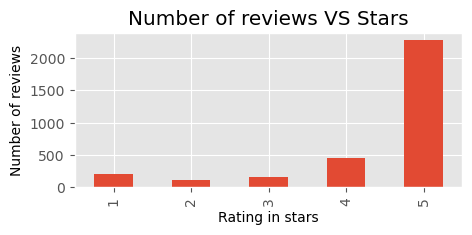

In [13]:
visual = df['rating'].value_counts().sort_index().plot(
    kind='bar',
    title='Number of reviews VS Stars',
    figsize=(5,2),
    xlabel= 'Rating in stars',
    ylabel= 'Number of reviews'
)
plt.show()

### 4) Data Cleaning

In [14]:
def number_word(stars):
    if stars == 5:
        return "Five stars"
    elif stars == 4:
        return "Four Stars"
    elif stars == 3:
        return "Three stars"
    elif stars == 2:
        return "Two stars"
    else:
        return "One star"

df['Reviews'] = df['Reviews'].fillna(df['rating'].apply(number_word))
df.iloc[12]


rating                     2
date               30-Jul-18
variation    Charcoal Fabric
Reviews            Two stars
feedback                   1
Name: 12, dtype: object

### 5) Assign Sentiment

In [15]:
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))
df.head()

,rating,date,variation,Reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,positive
3,1,31-Jul-18,Charcoal Fabric,"Horrible product, very useless",1,negative
4,3,31-Jul-18,Heather Gray Fabric,"Product is just average, expected better",1,neutral


Sentiment Counts:
positive: 2738 reviews
negative: 299 reviews
neutral: 155 reviews


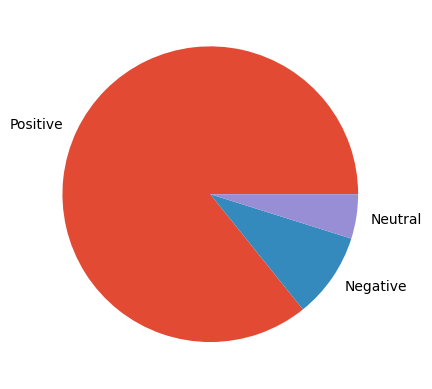

In [34]:
sentiment_counts = df['sentiment'].value_counts()

print("Sentiment Counts:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

y = np.array(sentiment_counts)
mylabels = ["Positive", "Negative", "Neutral"]

plt.pie(y, labels = mylabels)
plt.show() 

### 5) Pre-processing

In [17]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

df['Reviews'] = df['Reviews'].astype(str)
df['Reviews'] = df['Reviews'].apply(preprocess_text)
df.head(20)


,rating,date,variation,Reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,love echo,1,positive
1,5,31-Jul-18,Charcoal Fabric,loved,1,positive
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,positive
3,1,31-Jul-18,Charcoal Fabric,horrible product useless,1,negative
4,3,31-Jul-18,Heather Gray Fabric,product average expected better,1,neutral
5,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaur control l...,1,positive
6,5,31-Jul-18,Charcoal Fabric,music,1,positive
7,5,31-Jul-18,Heather Gray Fabric,received echo gift needed another bluetooth so...,1,positive
8,3,31-Jul-18,Sandstone Fabric,without cellphone use many feature ipad see us...,1,neutral
9,5,31-Jul-18,Charcoal Fabric,think th one purchased working getting one eve...,1,positive


### 6) Training model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['sentiment'], test_size=0.2, random_state=42)

### 7) TF-IDF vectoriser

In [19]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

### 8) Using sklearn.svm to build the model

In [20]:
model = LinearSVC()
model.fit(X_train_vectors, y_train)

LinearSVC()

### 9) Evaluating the model

In [21]:
y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print detailed results
print("Detailed Results:")
for i, review in enumerate(X_test):
    prediction = y_pred[i]
    actual = y_test.iloc[i]
    print(f"Review: {review}")
    print(f"Actual sentiment: {actual}")
    print(f"Predicted sentiment: {prediction}")
    print()

Accuracy: 0.9029733959311425
Detailed Results:
Review: use office another apartment music information
Actual sentiment: positive
Predicted sentiment: positive

Review: sound quality great still learning different thing fun
Actual sentiment: positive
Predicted sentiment: positive

Review: easy set
Actual sentiment: positive
Predicted sentiment: positive

Review: almost like star trek home fun try outsmart
Actual sentiment: positive
Predicted sentiment: positive

Review: love easy use
Actual sentiment: positive
Predicted sentiment: positive

Review: fun useful still learning new trick useful functionality future human computer interface household automation like star trek knew would soon
Actual sentiment: positive
Predicted sentiment: positive

Review: nd one come
Actual sentiment: positive
Predicted sentiment: positive

Review: work great
Actual sentiment: positive
Predicted sentiment: positive

Review: love echo
Actual sentiment: positive
Predicted sentiment: positive

Review: love dev

### 10) Testing the model

In [26]:
new_reviews = ["This product is amazing!","product is average, expected more" ,"Horrible product"]
new_reviews_vectors = vectorizer.transform(new_reviews)
predictions = model.predict(new_reviews_vectors)

for review, prediction in zip(new_reviews, predictions):
    print(f"Review: {review}\nSentiment: {prediction}\n")


Review: This product is amazing!
Sentiment: positive

Review: product is average, expected more
Sentiment: neutral

Review: Horrible product
Sentiment: negative



Enter your own review and check its sentiment

In [33]:
new = [input('Enter your review: ')]
new_reviews_vector = vectorizer.transform(new)
new_prediction = model.predict(new_reviews_vector)

for review, prediction in zip(new, new_prediction):
    print(f"Review: {review}\nSentiment: {prediction}\n")

Review: not
Sentiment: positive



### 11) SAVE MODEL

In [24]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(model, 'model.joblib')

['model.joblib']